# Bayes Decision Rule
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the calculation of **likelihood** of each features given particular class 
- implement the calculation of **posterior** of each class given particular feature
- implement the calculation of **minimal total risk** of bayes decision rule

In [8]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
data = sio.loadmat('data.mat')
x1_train, x1_test, x2_train, x2_test = data['x1_train'], data['x1_test'], data['x2_train'], data['x2_test']
all_x = np.concatenate([x1_train, x1_test, x2_train, x2_test], 1)
data_range = [np.min(all_x), np.max(all_x)]

In [10]:
from get_x_distribution import get_x_distribution

train_x = get_x_distribution(x1_train, x2_train, data_range)
test_x = get_x_distribution(x1_test, x2_test, data_range)

## Part 1 likelihood
Your code for this section will be written inside **bayes_decision_rule/likehood.py**. 

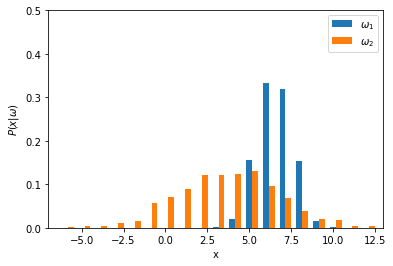

In [11]:
from likelihood import likelihood

l = likelihood(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), l.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, l.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(x|\omega)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 0.5])
plt.show()

In [12]:

#compute the number of all the misclassified x using maximum likelihood decision rule

# begin answer
C,N = train_x.shape
classOfFeature = np.zeros(N)

for i in range(N):
    arr = l[:,i]
    classOfFeature[i] = (np.where(arr == np.amax(arr)))[0]


mis_num = 0
for i in range(C):
    for j in range(N):
        if i != classOfFeature[j]:
            mis_num += test_x[i, j]

print(mis_num)
# end answer


64.0


## Part 2 posterior
Your code for this section will be written inside **bayes_decision_rule/posterior.py**. 

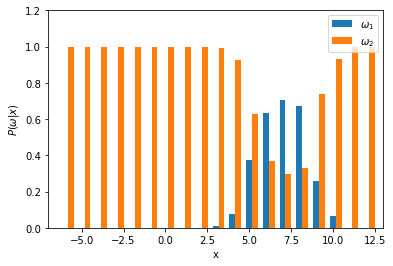

In [13]:
from posterior import posterior

p = posterior(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), p.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, p.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(\omega|x)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 1.2])
plt.show()

In [14]:

#compute the number of all the misclassified x using optimal bayes decision rule

# begin answer

C,N = train_x.shape
classOfFeature = np.zeros(N)

for i in range(N):
    arr = p[:,i]
    classOfFeature[i] = (np.where(arr == np.amax(arr)))[0]


mis_num = 0
for i in range(C):
    for j in range(N):
        if i != classOfFeature[j]:
            mis_num += test_x[i, j]

print(mis_num)
# end answer


47.0


## Part 3 risk


In [264]:
risk = np.array([[0, 1], [2, 0]])

#get the minimal risk using optimal bayes decision rule and risk weights

# begin answer
C, N = train_x.shape

total = np.sum(train_x)
total_per_feature = np.sum(train_x, axis = 0)
prob_per_feature = np.zeros(N)
for i in range(N):
    prob_per_feature[i] = total_per_feature[i] / total

# 2 conditional risks per feature value 
# N rows, 2 cols 
cond_risk = np.zeros((N,2))

# per feature value
for i in range(N):
    # per action
    for j in range(2):
        # per class
        for k in range(C):
            # conditional risk (feature_val_i, action_j) = sigma( loss(action_j, class_k) * posterior(class_k, feature_val_i) )
            cond_risk[i,j] += risk[j,k] * p[k,i]

# print(cond_risk)

min_cond_risk = np.amin(cond_risk, axis = 1) # per row

# print(min_cond_risk)

min_risk = 0

for i in range(N):
    min_risk += prob_per_feature[i] * min_cond_risk[i]

print(min_risk)

# end answer

0.2475
